# Data Science Project

* Name: Robert Cauvy
* Email: rcauvy@gmail.com


## TABLE OF CONTENTS 


- **[Introduction](#INTRODUCTION)<br>**
- **[OBTAIN](#OBTAIN)**<br>
- **[SCRUB](#SCRUB)**<br>
- **[EXPLORE](#EXPLORE)**<br>
- **[MODEL](#MODEL)**<br>
- **[iNTERPRET](#iNTERPRET)**<br>
- **[Conclusions/Recommendations](#CONCLUSIONS-&-RECOMMENDATIONS)<br>**
___

![title](images/15242740638_a94d9c7527_c.jpg)

# Business Problem

As the Covid-19 virus has spread throughout the world. Countries across the world are working to innoculate their populations and protect against future outbreaks it is essential to know which populations are at risk of not receiving the vaccines. This information would help public health organizations optimally target their resources to informing and educating individuals about the immunizations.

# OBTAIN

We will be using a dataset from Data Driven competition (drivendata.org/competitions/66/flu-shot-learning/data/) that contains approximately 26,707 survey responses relating to the H1N1 and seasonal flu to train various machine learning algorithms in order to predict how likely an individual is to receive a vaccine.

## Imports

In [133]:
## Data Handling
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
from random import randint

## Data Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Settings
from IPython.display import display
%matplotlib inline
sns.set_style("darkgrid")
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')
pd.set_option('max_rows', 100)
import warnings
warnings.filterwarnings('ignore')

## Scikit-Learn
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, LabelEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn import metrics 
from sklearn.multioutput import ClassifierChain
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score, plot_confusion_matrix, classification_report
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC

from sklearn import set_config
set_config(display='diagram')

import missingno

In [3]:
# Data Source
# https://www.drivendata.org/competitions/66/flu- -learning/data/

In [22]:
## Reading csv data and loading into a DataFrame

features_df = pd.read_csv('data/training_set_features.csv',index_col=0)
features_df

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,3.00,1.00,2.00,2.00,1.00,2.00,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.00,0.00,NaN,NaN
1,3.00,2.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,5.00,4.00,4.00,4.00,2.00,4.00,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.00,0.00,pxcmvdjn,xgwztkwe
2,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,nan,nan,1.00,0.00,0.00,nan,3.00,1.00,1.00,4.00,1.00,2.00,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.00,0.00,rucpziij,xtkaffoo
3,1.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,nan,3.00,3.00,5.00,5.00,4.00,1.00,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.00,0.00,NaN,NaN
4,2.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,nan,3.00,3.00,2.00,3.00,1.00,4.00,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.00,0.00,wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,3.00,1.00,1.00,5.00,2.00,2.00,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.00,0.00,NaN,NaN
26703,1.00,2.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,4.00,2.00,2.00,5.00,1.00,1.00,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.00,0.00,fcxhlnwr,cmhcxjea
26704,2.00,2.00,0.00,1.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,nan,4.00,4.00,2.00,5.00,4.00,2.00,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.00,0.00,NaN,NaN


In [60]:
# Dropping Features Specific to H1N1
seas_feats_df =features_df.drop(columns=['h1n1_concern','h1n1_knowledge','doctor_recc_h1n1',
                 'opinion_h1n1_vacc_effective','opinion_h1n1_risk',
                 'opinion_h1n1_sick_from_vacc'],axis=1)

In [57]:
labels_df = pd.read_csv('data/training_set_labels.csv',index_col=0)
seas_labels_df = labels_df.drop('h1n1_vaccine',axis=1)
seas_labels_df

,seasonal_vaccine
respondent_id,
0,0
1,1
2,0
3,1
4,0
...,...
26702,0
26703,0
26704,1


In [7]:
# Confirming features and the labels rows match up. 
np.testing.assert_array_equal(features_df.index.values, labels_df.index.values)

The assertion ran without an error, indicating the features and labels line up correctly.

In [23]:
# Joining Features and Labels Dataframes
joined_df = features_df.join(labels_df)
joined_df

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,3.00,1.00,2.00,2.00,1.00,2.00,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.00,0.00,NaN,NaN,0,0
1,3.00,2.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,5.00,4.00,4.00,4.00,2.00,4.00,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.00,0.00,pxcmvdjn,xgwztkwe,0,1
2,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,nan,nan,1.00,0.00,0.00,nan,3.00,1.00,1.00,4.00,1.00,2.00,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.00,0.00,rucpziij,xtkaffoo,0,0
3,1.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,nan,3.00,3.00,5.00,5.00,4.00,1.00,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.00,0.00,NaN,NaN,0,1
4,2.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,nan,3.00,3.00,2.00,3.00,1.00,4.00,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.00,0.00,wxleyezf,emcorrxb,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,3.00,1.00,1.00,5.00,2.00,2.00,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.00,0.00,NaN,NaN,0,0
26703,1.00,2.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,4.00,2.00,2.00,5.00,1.00,1.00,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.00,0.00,fcxhlnwr,cmhcxjea,0,0
26704,2.00,2.00,0.00,1.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,nan,4.00,4.00,2.00,5.00,4.00,2.00,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.00,0.00,NaN,NaN,0,1


In [61]:
# Joining Features and Labels Dataframes
seas_joined_df = seas_feats_df.join(seas_labels_df)
seas_joined_df

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,2.00,1.00,2.00,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.00,0.00,NaN,NaN,0
1,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,4.00,2.00,4.00,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.00,0.00,pxcmvdjn,xgwztkwe,1
2,0.00,1.00,0.00,0.00,0.00,0.00,0.00,nan,1.00,0.00,0.00,nan,4.00,1.00,2.00,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.00,0.00,rucpziij,xtkaffoo,0
3,0.00,1.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,nan,5.00,4.00,1.00,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.00,0.00,NaN,NaN,1
4,0.00,1.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,nan,3.00,1.00,4.00,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.00,0.00,wxleyezf,emcorrxb,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,nan,5.00,2.00,2.00,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.00,0.00,NaN,NaN,0
26703,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,5.00,1.00,1.00,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.00,0.00,fcxhlnwr,cmhcxjea,0
26704,0.00,1.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,nan,5.00,4.00,2.00,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.00,0.00,NaN,NaN,1


The raw dataset contains 29 features, 1 target, and 26,707 instances.

### Data Glossary

**behavioral_antiviral_meds** - Has taken antiviral medications. (binary)

**behavioral_avoidance** - Has avoided close contact with others with flu-like symptoms. (binary)

**behavioral_face_mask** - Has bought a face mask. (binary)

**behavioral_wash_hands** - Has frequently washed hands or used hand sanitizer. (binary)

**behavioral_large_gatherings** - Has reduced time at large gatherings. (binary)

**behavioral_outside_home** - Has reduced contact with people outside of own household. (binary)

**behavioral_touch_face** - Has avoided touching eyes, nose, or mouth. (binary)

**doctor_recc_h1n1** - H1N1 flu vaccine was recommended by doctor. (binary)

**doctor_recc_seasonal** - Seasonal flu vaccine was recommended by doctor. (binary)

**chronic_med_condition** - Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)

**child_under_6_months** - Has regular close contact with a child under the age of six months. (binary)

**health_worker** - Is a healthcare worker. (binary)

**health_insurance** - Has health insurance. (binary)

**opinion_seas_vacc_effective** - Respondent's opinion about seasonal flu vaccine effectiveness.\
1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.

**opinion_seas_risk** - Respondent's opinion about risk of getting sick with seasonal flu without vaccine.\
1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.

**opinion_seas_sick_from_vacc** - Respondent's worry of getting sick from taking seasonal flu vaccine.\
1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.

**age_group** - Age group of respondent.

**education** - Self-reported education level.

**race** - Race of respondent.

**sex** - Sex of respondent.

**income_poverty** - Household annual income of respondent with respect to 2008 Census poverty thresholds.

**marital_status** - Marital status of respondent.

**rent_or_own** - Housing situation of respondent.

**employment_status** - Employment status of respondent.

**hhs_geo_region** - Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings.

**census_msa** - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.

**household_adults** - Number of other adults in household, top-coded to 3.

**household_children** - Number of children in household, top-coded to 3.

**employment_industry** - Type of industry respondent is employed in. Values are represented as short random character strings.

**employment_occupation** - Type of occupation of respondent. Values are represented as short random character strings.

In [9]:
seas_feats_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   behavioral_antiviral_meds    26636 non-null  float64
 1   behavioral_avoidance         26499 non-null  float64
 2   behavioral_face_mask         26688 non-null  float64
 3   behavioral_wash_hands        26665 non-null  float64
 4   behavioral_large_gatherings  26620 non-null  float64
 5   behavioral_outside_home      26625 non-null  float64
 6   behavioral_touch_face        26579 non-null  float64
 7   doctor_recc_seasonal         24547 non-null  float64
 8   chronic_med_condition        25736 non-null  float64
 9   child_under_6_months         25887 non-null  float64
 10  health_worker                25903 non-null  float64
 11  health_insurance             14433 non-null  float64
 12  opinion_seas_vacc_effective  26245 non-null  float64
 13  opinion_seas_ris

Most of the data fields are stored as floats. Confirming with the data glossary, some fields are actually binary or ordinal categories. The other data fields are stored as objects but most are also able to be encoded into ordinal and  nominal categorical variables.

In [10]:
print(seas_labels_df['seasonal_vaccine'].value_counts(dropna=False))

0    14272
1    12435
Name: seasonal_vaccine, dtype: int64


Looks like there are target responses for every record in the dataset which is great. We won't have to drop any rows. See target proportions visualized below.

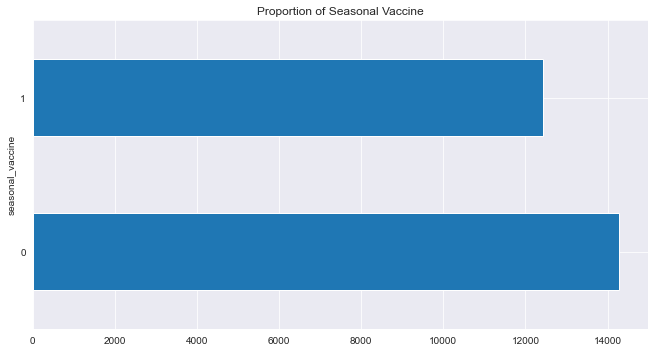

In [11]:
fig, ax = plt.subplots(figsize=(9.2, 5))

n_obs = labels_df.shape

(seas_labels_df['seasonal_vaccine']
    .value_counts()
    .plot.barh(title="Proportion of Seasonal Vaccine", ax=ax)
)
ax.set_ylabel("seasonal_vaccine")

fig.tight_layout()

# SCRUB

Often times with survey collected data, there are some going to be missing responses. In order to process the data, each field will need to be evaluated to determine how missing values should be treated.

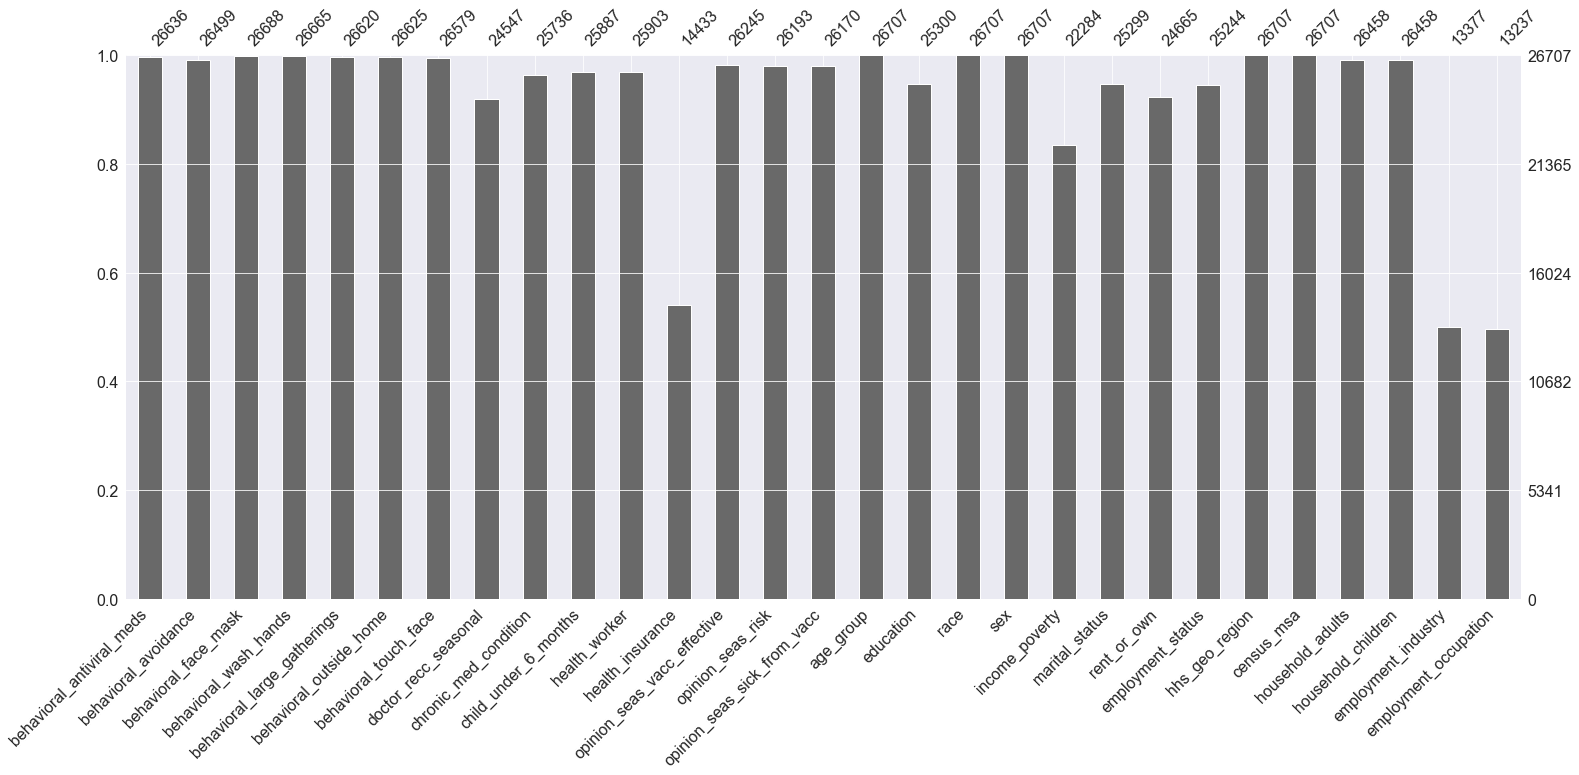

In [12]:
missingno.bar(seas_feats_df);

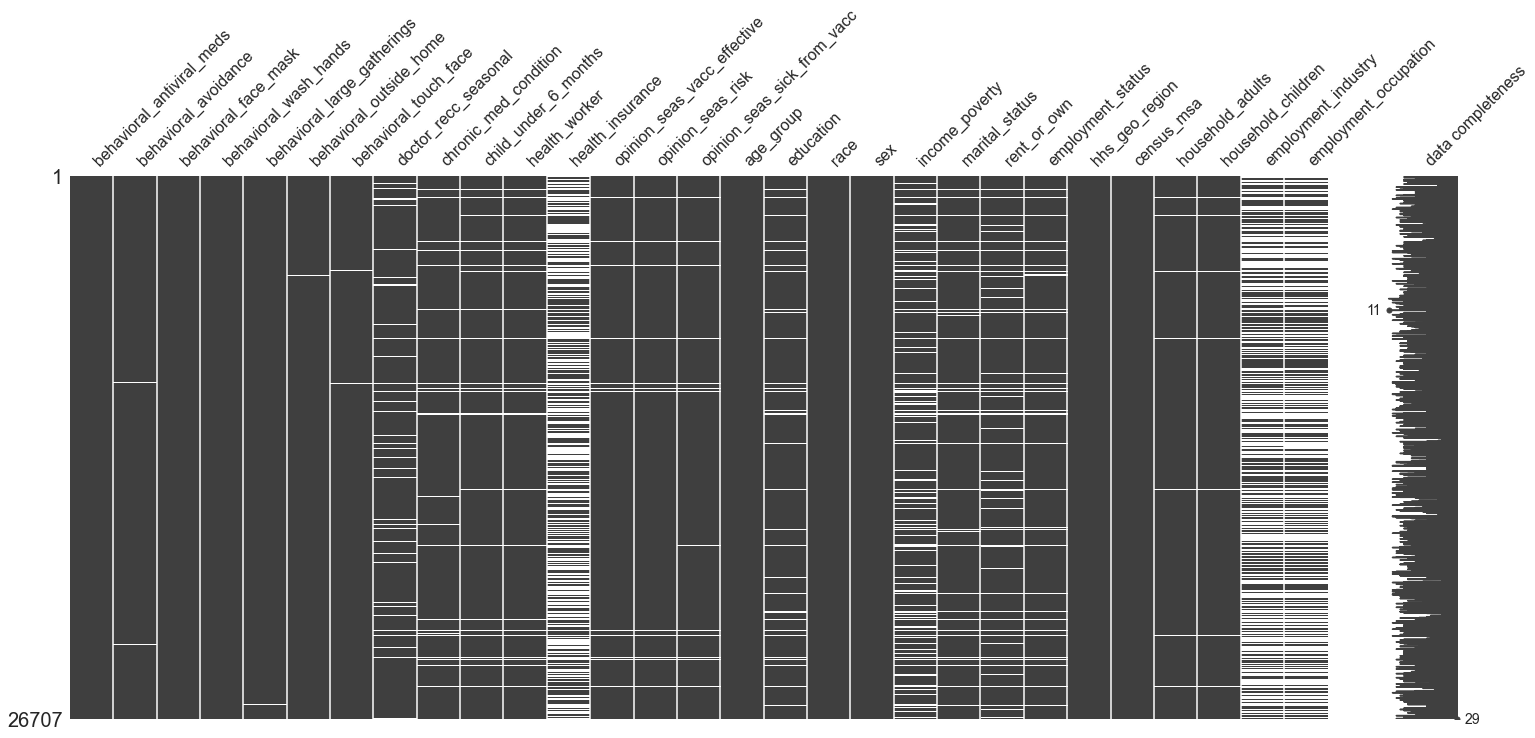

In [13]:
missingno.matrix(seas_feats_df, labels=True);

After inspecting the visualization, it is evident that the features missing the most responses are health insurance and employment details. Since these are categorical variables, we can create a new category and impute for the missing values. 

Instead of performing any manual updates to the remaining values, I will test different imputation methods as part of my modeling pipeline. </br></br> Potential methods would include:

Imputing the string "MISSING"
Imputing the most frequent value for string values
Using the mean, median, or mode for numeric datatypes
The benefit of including this step in a pipeline is that I will be able to include these different methods in a GridSearchCV as part of my hyperparameter turning steps.

# EXPLORE

In [27]:
counts = (joined_df[['opinion_seas_risk', 'seasonal_vaccine']]
              .groupby(['opinion_seas_risk', 'seasonal_vaccine'])
              .size()
              .unstack('seasonal_vaccine')
         )
counts

seasonal_vaccine,0,1
opinion_seas_risk,,
1.00,4723,1251
2.00,5613,3341
3.00,300,377
4.00,2568,5062
5.00,755,2203


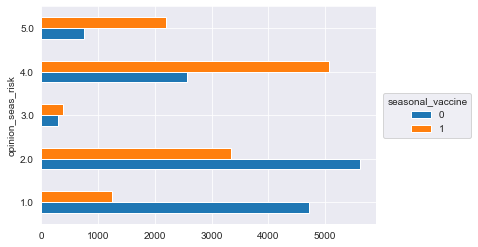

In [30]:
ax = counts.plot.barh()
ax.legend(
    loc='center right', 
    bbox_to_anchor=(1.3, 0.5), 
    title='seasonal_vaccine'
);

In [31]:
seasonal_concern_counts = counts.sum(axis='columns')
seasonal_concern_counts

opinion_seas_risk
1.00    5974
2.00    8954
3.00     677
4.00    7630
5.00    2958
dtype: int64

In [32]:
props = counts.div(seasonal_concern_counts, axis='index')
props

seasonal_vaccine,0,1
opinion_seas_risk,,
1.00,0.79,0.21
2.00,0.63,0.37
3.00,0.44,0.56
4.00,0.34,0.66
5.00,0.26,0.74


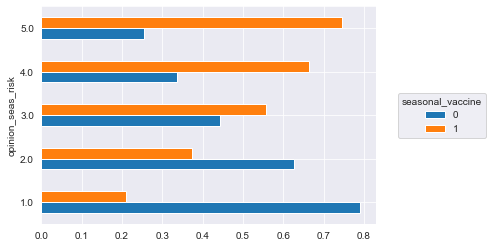

In [34]:
ax = props.plot.barh()
ax.legend(
    loc='center left', 
    bbox_to_anchor=(1.05, 0.5),
    title='seasonal_vaccine'
);

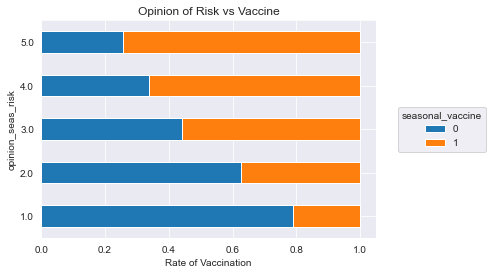

In [42]:
ax = props.plot.barh(stacked=True)
ax.set_title('Opinion of Risk vs Vaccine')
ax.set_xlabel('Rate of Vaccination')
ax.legend(
    loc='center left', 
    bbox_to_anchor=(1.05, 0.5),
    title='seasonal_vaccine'
);

In [183]:
# Creating a function to display relationships between feature variabls and targets.

def vaxx_rate_plots(feature, label, data, ax=None):
    """Stacked bar chart of vaccination rate for `label` against 
    `feature`. 
    
    Args:
        feature (string): column name of feature variable
        label (string): column name of target variable
        data (pandas DataFrame): dataframe that contains columns 
            `col` and `target`
        ax (matplotlib axes object, optional): matplotlib axes 
            object to attach plot to
    """
    counts = (joined_df[[label, feature]]
                  .groupby([label, feature])
                  .size()
                  .unstack(label)
             )
    group_counts = counts.sum(axis='columns')
    props = counts.div(group_counts, axis='index')

    props.plot(kind="barh", stacked=True, ax=ax)
    ax.set_xlabel('Rate of Vaccination')
    ax.legend().remove()

In [53]:
# Creating a function to display relationships between feature variabls and targets.

def vaxx_rates(feature, target, df, ax=ax):
    
    """Stacked bar chart of vaccination rate for `target` against 
    `feature`. 
    
    Args:
        feaure (string): column name of feature variable
        target (string): column name of target variable
        df (pandas DataFrame): dataframe that contains columns 
            `col` and `target`
        ax (matplotlib axes object, optional): matplotlib axes 
            object to attach plot to
    """
    counts = (joined_df[[target, feature]]
                  .groupby([target, feature])
                  .size()
                  .unstack(target)
             )
    group_counts = counts.sum(axis=1)
    props = counts.div(group_counts, axis=0)

    props.plot(kind="barh", stacked=True, ax=ax)

In [55]:
vaxx_rates('sex','seasonal_vaccine',joined_df)

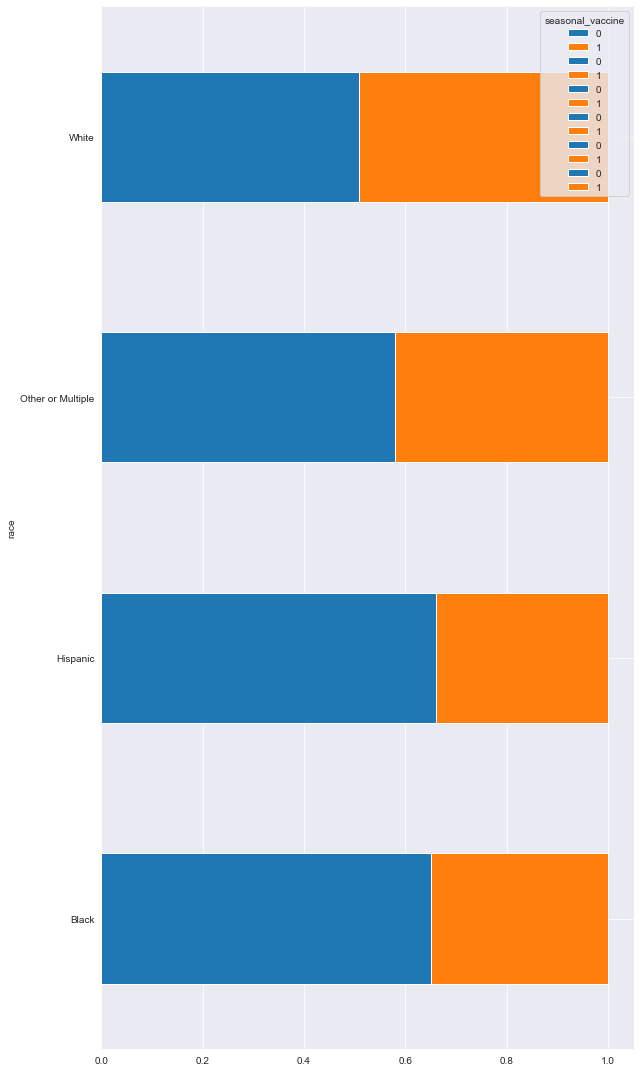

In [51]:
cols_to_plot = [
    'opinion_seas_vacc_effective',
    'opinion_seas_risk',
    'opinion_seas_sick_from_vacc',
    'sex',
    'age_group',
    'race',
]

fig, ax = plt.subplots(figsize=(9,len(cols_to_plot)*2.5)
)

for col in cols_to_plot:
    vaxx_rates(
        col, 'seasonal_vaccine', joined_df, ax=ax
    )



fig.tight_layout()

In [47]:
vaxx_rates('sex','seasonal_vaccine', joined_df)

NameError: name 'vaxx_rates' is not defined

In [ ]:
# Create a loop to plot each feature column in relations to seasonal_vaccine targets.

cols_to_plot = list(seas_feats_df.columns)


for col in cols_to_plot:
   
    vaxx_rates(col, 'seasonal_vaccine', joined_df)


fig.tight_layout();



In [20]:
# for col in list(seas_feats_df):
ax = joined_df.plot.barh(x='behavioral_face_mask',y='seasonal_vaccine',stacked=True)

Error in callback <function flush_figures at 0x7ff6a029c040> (for post_execute):


KeyboardInterrupt: 

In [ ]:
ax = counts.plot.barh()
ax.invert_yaxis()
ax.legend(
    loc='center right', 
    bbox_to_anchor=(1.3, 0.5), 
    title='h1n1_vaccine'
)

In [187]:
def vaccination_rate_plot(col, target, data, ax=None):
    """Stacked bar chart of vaccination rate for `target` against 
    `col`. 
    
    Args:
        col (string): column name of feature variable
        target (string): column name of target variable
        data (pandas DataFrame): dataframe that contains columns 
            `col` and `target`
        ax (matplotlib axes object, optional): matplotlib axes 
            object to attach plot to
    """
    counts = (joined_df[[target, col]]
                  .groupby([target, col])
                  .size()
                  .unstack(target)
             )
    group_counts = counts.sum(axis='columns')
    props = counts.div(group_counts, axis='index')

    props.plot(kind="barh", stacked=True, ax=ax)

    ax.legend().remove()

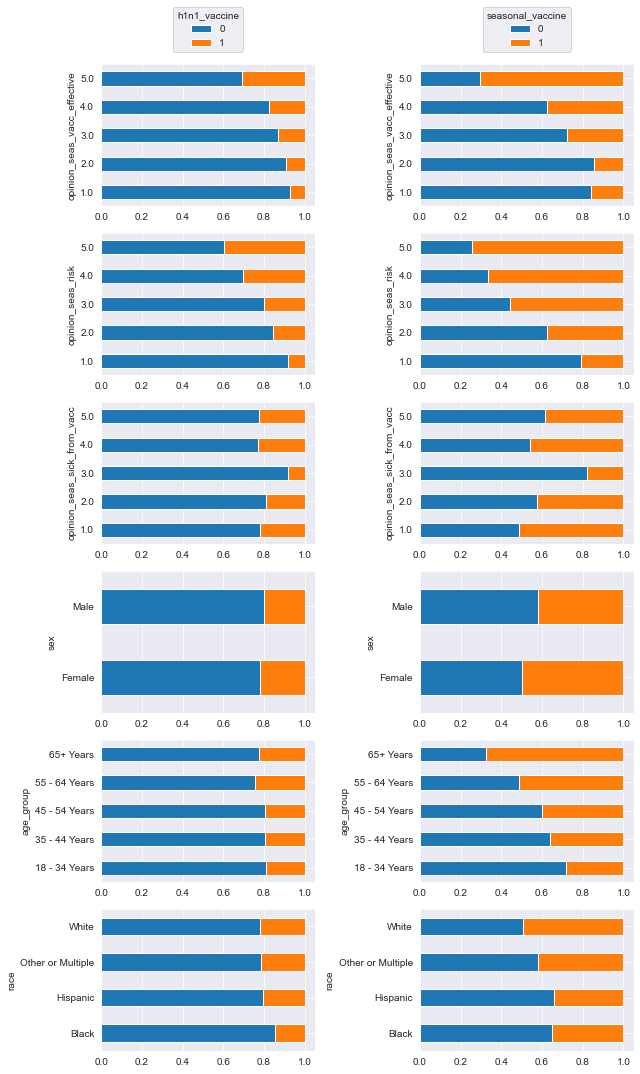

In [188]:
# Loop through several columns and plot against both h1n1_vaccine and seasonal_vaccine.

cols_to_plot = [
    'opinion_seas_vacc_effective',
    'opinion_seas_risk',
    'opinion_seas_sick_from_vacc',
    'sex',
    'age_group',
    'race',
]

fig, ax = plt.subplots(
    len(cols_to_plot), 2, figsize=(9,len(cols_to_plot)*2.5)
)
for idx, col in enumerate(cols_to_plot):
    vaccination_rate_plot(
        col, 'h1n1_vaccine', joined_df, ax=ax[idx, 0]
    )
    vaccination_rate_plot(
        col, 'seasonal_vaccine', joined_df, ax=ax[idx, 1]
    )
    
ax[0, 0].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='h1n1_vaccine'
)
ax[0, 1].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='seasonal_vaccine'
)
fig.tight_layout()

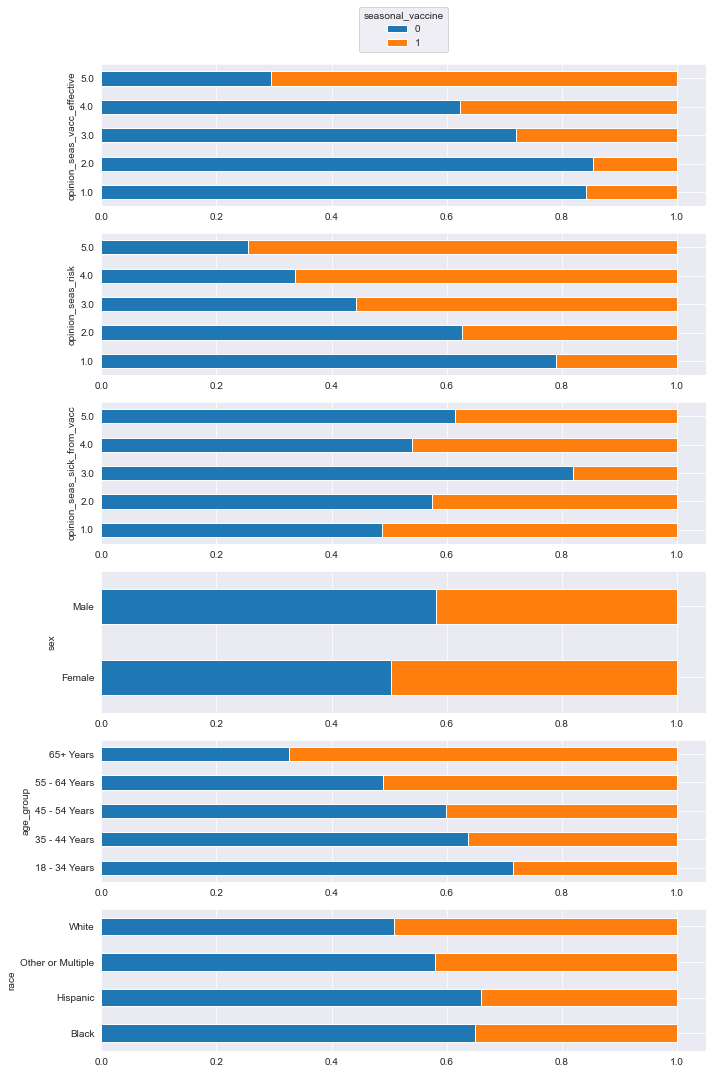

In [193]:
# Loop through several columns and plot against both h1n1_vaccine and seasonal_vaccine.

cols_to_plot = [
    'opinion_seas_vacc_effective',
    'opinion_seas_risk',
    'opinion_seas_sick_from_vacc',
    'sex',
    'age_group',
    'race',
]

fig, ax = plt.subplots(
    len(cols_to_plot), figsize=(10,len(cols_to_plot)*2.5)
)
for idx, col in enumerate(cols_to_plot):
    
    vaccination_rate_plot(
        col, 'seasonal_vaccine', joined_df, ax=ax[idx]
    )
    

ax[0].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='seasonal_vaccine'
)
fig.tight_layout()

# MODEL

## Preprocessing

### Perform Train-Test-Split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(
    seas_feats_df, 
    seas_labels_df, 
    test_size =.25, 
    random_state=42
)

X_train.head()

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
25194,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,0.00,0.00,0.00,nan,4.00,2.00,2.00,18 - 34 Years,12 Years,White,Female,NaN,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,1.00,1.00,NaN,NaN
14006,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,4.00,5.00,4.00,45 - 54 Years,Some College,White,Female,NaN,Married,NaN,Employed,lzgpxyit,"MSA, Not Principle City",2.00,1.00,fcxhlnwr,oijqvulv
11285,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,4.00,2.00,1.00,45 - 54 Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,kbazzjca,"MSA, Principle City",0.00,1.00,wlfvacwt,hfxkjkmi
2900,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,4.00,4.00,2.00,55 - 64 Years,College Graduate,White,Male,Below Poverty,Not Married,Own,Employed,mlyzmhmf,"MSA, Not Principle City",0.00,0.00,mcubkhph,ukymxvdu
19083,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,nan,nan,nan,nan,1.00,2.00,4.00,18 - 34 Years,NaN,White,Female,NaN,NaN,NaN,NaN,bhuqouqj,"MSA, Not Principle City",nan,nan,NaN,NaN


In [63]:
y_train['seasonal_vaccine'].value_counts(normalize=True)

0   0.53
1   0.47
Name: seasonal_vaccine, dtype: float64

In [64]:
y_test['seasonal_vaccine'].value_counts(normalize=True)

0   0.54
1   0.46
Name: seasonal_vaccine, dtype: float64

### Impute Missing Values, Scaling and Encoding Pipelines

There are two important data preprocessing steps before jumping to the logistic regression:

Scaling: Transform all features to be on the same scale. This matters when using regularization, which we will discuss in the next section. We will use StandardScaler, also known as Z-score scaling. This scales and shifts features so that they have zero mean and unit variance.
NA Imputation: Logistic regression does not handle NA values. We will use median imputation, which fills missing values with the median from the training data, implemented with SimpleImputer.

In [65]:
# Copying the train test split
X_train_tf = X_train.copy()
X_test_tf = X_test.copy()

In [66]:
# Breaking out numerical and categorical columns to determine which 
# columns need to be sclaed and which need to be encoded.
#  make cat_cols and num_cols
cat_cols = X_train_tf.select_dtypes('O').columns.tolist()
num_cols = X_train_tf.select_dtypes('number').columns.tolist()
num_cols,cat_cols

(['behavioral_antiviral_meds',
  'behavioral_avoidance',
  'behavioral_face_mask',
  'behavioral_wash_hands',
  'behavioral_large_gatherings',
  'behavioral_outside_home',
  'behavioral_touch_face',
  'doctor_recc_seasonal',
  'chronic_med_condition',
  'child_under_6_months',
  'health_worker',
  'health_insurance',
  'opinion_seas_vacc_effective',
  'opinion_seas_risk',
  'opinion_seas_sick_from_vacc',
  'household_adults',
  'household_children'],
 ['age_group',
  'education',
  'race',
  'sex',
  'income_poverty',
  'marital_status',
  'rent_or_own',
  'employment_status',
  'hhs_geo_region',
  'census_msa',
  'employment_industry',
  'employment_occupation'])

#### Numerical Columns

In [67]:
# Create a transformer pipeline that will impute missing values using the 
# median and then standardize all numerical columns

num_tf = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())])

In [68]:
X_train_num_tf = num_tf.fit_transform(X_train[num_cols])
X_test_num_tf = num_tf.transform(X_test[num_cols])
X_train_num_tf

array([[-0.22644649, -1.62924603, -0.27402537, ..., -0.08933262,
         0.15110623,  0.50597212],
       [-0.22644649,  0.61378084, -0.27402537, ...,  1.42512566,
         1.48974303,  0.50597212],
       [-0.22644649, -1.62924603, -0.27402537, ..., -0.84656177,
        -1.18753056,  0.50597212],
       ...,
       [-0.22644649,  0.61378084, -0.27402537, ..., -0.08933262,
         0.15110623, -0.57309747],
       [-0.22644649,  0.61378084, -0.27402537, ...,  1.42512566,
         0.15110623, -0.57309747],
       [-0.22644649, -1.62924603, -0.27402537, ..., -0.08933262,
        -1.18753056, -0.57309747]])

#### Categorical Columns

In [69]:
# Create a transformer pipeline that will impute missing values using a 
# constany placeholder 'Unknown' and then OneHotEncode all numerical columns

cat_tf = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant',fill_value='Unknown')),
    ('ohe',OneHotEncoder(sparse=False,handle_unknown='ignore'))])

In [70]:
X_train_cat_tf =cat_tf.fit_transform(X_train[cat_cols])
X_test_cat_tf =cat_tf.transform(X_test[cat_cols])

X_train_cat_tf

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

#### Combining together with ColumnTransformer

In [71]:
# Join both numerical and categorical Pipelines using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('Num',num_tf,num_cols),
    ('Cat',cat_tf,cat_cols)])
preprocessor

ColumnTransformer(transformers=[('Num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['behavioral_antiviral_meds',
                                  'behavioral_avoidance',
                                  'behavioral_face_mask',
                                  'behavioral_wash_hands',
                                  'behavioral_large_gatherings',
                                  'behavioral_outside_home',
                                  'behavioral_touch_face',
                                  'doctor_recc_seasonal',
                                  'chronic_med_condi...
                                  'household_adults', 'household_children']),
                                ('Cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='Unknown',
                                                                strategy='constant')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['age_group', 'education', 'race', 'sex',
                                  'income_poverty', 'marital_status',
                                  'rent_or_own', 'employment_status',
                                  'hhs_geo_region', 'census_msa',
                                  'employment_industry',
                                  'employment_occupation'])])

In [211]:
## Get X_train and X_test from column transformer
X_train_tf = preprocessor.fit_transform(X_train)
X_test_tf = preprocessor.transform(X_test)

In [73]:
cat_features = list(preprocessor.named_transformers_['Cat'].named_steps['ohe']
                    .get_feature_names(cat_cols))

In [74]:
X_cols = num_cols+cat_features

In [75]:
X_train_df = pd.DataFrame(preprocessor.transform(X_train),
                          index=X_train.index, columns=X_cols)
X_test_df = pd.DataFrame(preprocessor.transform(X_test),
                          index=X_test.index, columns=X_cols)


## Tranform X_train and X_test and make into DataFrames
X_train_df

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,age_group_18 - 34 Years,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,education_12 Years,education_< 12 Years,education_College Graduate,education_Some College,education_Unknown,race_Black,race_Hispanic,race_Other or Multiple,race_White,sex_Female,sex_Male,"income_poverty_<= $75,000, Above Poverty","income_poverty_> $75,000",income_poverty_Below Poverty,income_poverty_Unknown,marital_status_Married,marital_status_Not Married,marital_status_Unknown,rent_or_own_Own,rent_or_own_Rent,rent_or_own_Unknown,employment_status_Employed,employment_status_Not in Labor Force,employment_status_Unemployed,employment_status_Unknown,hhs_geo_region_atmpeygn,hhs_geo_region_bhuqouqj,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA,employment_industry_Unknown,employment_industry_arjwrbjb,employment_industry_atmlpfrs,employment_industry_cfqqtusy,employment_industry_dotnnunm,employment_industry_fcxhlnwr,employment_industry_haxffmxo,employment_industry_ldnlellj,employment_industry_mcubkhph,employment_industry_mfikgejo,employment_industry_msuufmds,employment_industry_nduyfdeo,employment_industry_phxvnwax,employment_industry_pxcmvdjn,employment_industry_qnlwzans,employment_industry_rucpziij,employment_industry_saaquncn,employment_industry_vjjrobsf,employment_industry_wlfvacwt,employment_industry_wxleyezf,employment_industry_xicduogh,employment_industry_xqicxuve,employment_occupation_Unknown,employment_occupation_bxpfxfdn,employment_occupation_ccgxvspp,employment_occupation_cmhcxjea,employment_occupation_dcjcmpih,employment_occupation_dlvbwzss,employment_occupation_emcorrxb,employment_occupation_haliazsg,employment_occupation_hfxkjkmi,employment_occupation_hodpvpew,employment_occupation_kldqjyjy,employment_occupation_mxkfnird,employment_occupation_oijqvulv,employment_occupation_pvmttkik,employment_occupation_qxajmpny,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
25194,-0.23,-1.63,-0.27,-2.16,-0.74,-0.71,-1.44,-0.66,-0.61,-0.29,-0.35,0.26,-0.03,-0.51,-0.09,0.15,0.51,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
14006,-0.23,0.61,-0.27,0.46,-0.74,-0.71,-1.44,1.51,1.63,3.40,-0.35,0.26,-0.03,1.67,1.43,1.49,0.51,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
11285,-0.23,-1.63,-0.27,-2.16,-0.74,-0

In [76]:
# Confirming Preprocessing CT
X_train_df.describe().round(2)

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,age_group_18 - 34 Years,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,education_12 Years,education_< 12 Years,education_College Graduate,education_Some College,education_Unknown,race_Black,race_Hispanic,race_Other or Multiple,race_White,sex_Female,sex_Male,"income_poverty_<= $75,000, Above Poverty","income_poverty_> $75,000",income_poverty_Below Poverty,income_poverty_Unknown,marital_status_Married,marital_status_Not Married,marital_status_Unknown,rent_or_own_Own,rent_or_own_Rent,rent_or_own_Unknown,employment_status_Employed,employment_status_Not in Labor Force,employment_status_Unemployed,employment_status_Unknown,hhs_geo_region_atmpeygn,hhs_geo_region_bhuqouqj,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA,employment_industry_Unknown,employment_industry_arjwrbjb,employment_industry_atmlpfrs,employment_industry_cfqqtusy,employment_industry_dotnnunm,employment_industry_fcxhlnwr,employment_industry_haxffmxo,employment_industry_ldnlellj,employment_industry_mcubkhph,employment_industry_mfikgejo,employment_industry_msuufmds,employment_industry_nduyfdeo,employment_industry_phxvnwax,employment_industry_pxcmvdjn,employment_industry_qnlwzans,employment_industry_rucpziij,employment_industry_saaquncn,employment_industry_vjjrobsf,employment_industry_wlfvacwt,employment_industry_wxleyezf,employment_industry_xicduogh,employment_industry_xqicxuve,employment_occupation_Unknown,employment_occupation_bxpfxfdn,employment_occupation_ccgxvspp,employment_occupation_cmhcxjea,employment_occupation_dcjcmpih,employment_occupation_dlvbwzss,employment_occupation_emcorrxb,employment_occupation_haliazsg,employment_occupation_hfxkjkmi,employment_occupation_hodpvpew,employment_occupation_kldqjyjy,employment_occupation_mxkfnird,employment_occupation_oijqvulv,employment_occupation_pvmttkik,employment_occupation_qxajmpny,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv
count,"20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.00","20,030.0

              precision    recall  f1-score   support

           0       0.54      0.53      0.54      3634
           1       0.45      0.47      0.46      3043

    accuracy                           0.50      6677
   macro avg       0.50      0.50      0.50      6677
weighted avg       0.50      0.50      0.50      6677



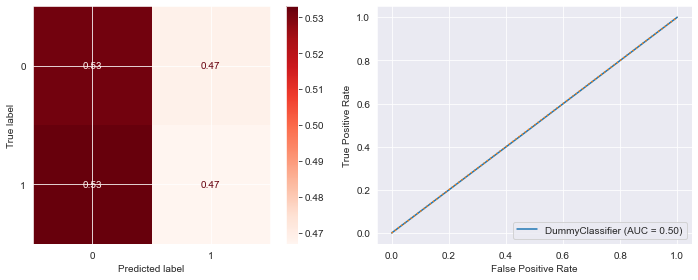

Training Score = 0.51
Test Score = 0.50


In [216]:
## Creating baseline classifier model

base = DummyClassifier(strategy='stratified', random_state = 42)

base.fit(X_train_df, y_train)

eval_clf(base,X_test_tf,y_test,X_train=X_train_df,y_train=y_train)

## Logistic Regression

### Fitting Model

In [77]:
# Fit a vanilla Logistic Regression to the Pipeline
lr_estimator = LogisticRegression()

In [78]:
# Combine preprocessing steps and model
full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimator", lr_estimator),
])

In [79]:
%%time

# Train model
full_pipeline.fit(X_train, y_train)

# Predict on evaluation set
preds = pd.DataFrame(full_pipeline.predict(X_test))
preds.columns = seas_labels_df.columns

CPU times: user 1.14 s, sys: 73.1 ms, total: 1.22 s
Wall time: 747 ms


### Evaluating Model Performance

In [182]:
### Function to produce the model's coefficients
# Adapted from https://github.com/jirvingphd/Online-DS-FT-022221-Cohort-Notes-FLEX/blob/master/Phase_3/topic_25_logistic_regression/topic_25_pt2_LogisticRegression_titanic-v2-SG.ipynb

def eval_clf(model, X_test_tf,y_test,cmap='Reds',
                            normalize='true',classes=None,figsize=(10,4),
                            X_train = None, y_train = None,):
    """Evaluates a scikit-learn binary classification model.

    Args:
        model ([type]): [description]
        X_test_tf ([type]): [description]
        y_test ([type]): [description]
        cmap (str, optional): [description]. Defaults to 'Reds'.
        normalize (str, optional): [description]. Defaults to 'true'.
        classes ([type], optional): [description]. Defaults to None.
        figsize (tuple, optional): [description]. Defaults to (8,4).
        X_train ([type], optional): [description]. Defaults to None.
        y_train ([type], optional): [description]. Defaults to None.
    """
    

    y_hat_test = model.predict(X_test_tf)
    print(metrics.classification_report(y_test, y_hat_test,target_names=classes))
    

    fig,ax = plt.subplots(ncols=2,figsize=figsize)
    plt.grid(False)
    metrics.plot_confusion_matrix(model, X_test_tf,y_test,cmap=cmap, 
                                  normalize=normalize,display_labels=classes,
                                 ax=ax[0])
    
    curve = metrics.plot_roc_curve(model,X_test_tf,y_test,ax=ax[1])
    curve.ax_.grid()
    curve.ax_.plot([0,1],[0,1],ls=':')
    fig.tight_layout()
    plt.show()
    
    ## Add comparing Scores if X_train and y_train provided.
    if (X_train is not None) & (y_train is not None):
        print(f"Training Score = {model.score(X_train,y_train):.2f}")
        print(f"Test Score = {model.score(X_test_tf,y_test):.2f}")

In [180]:
eval_clf(lr_estimator,X_test_tf,y_test,X_train=X_train_df,y_train=y_train)

ValueError: X has 99 features per sample; expecting 106

### Hyperparameter Tuning With GridSearch 

In [82]:
# Logistic regression, optimized for accuracy
logreg = LogisticRegression(max_iter=600, class_weight='balanced')

param_grid = {
    'C':[0.01, 1, 100, 1e6],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

logreg_gs = GridSearchCV(logreg, param_grid, scoring='accuracy', n_jobs=-1,  
                     verbose=True)


logreg_gs.fit(X_train_df, y_train)

print(logreg_gs.best_estimator_)
print(logreg_gs.best_score_)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  2.6min finished


LogisticRegression(C=1, class_weight='balanced', max_iter=600, penalty='l1',
                   solver='liblinear')
0.7768347478781827


In [83]:
logreg2 = LogisticRegression(max_iter=600, penalty='l1', solver='liblinear',C=1,class_weight='balanced')

In [84]:
# Re-run full pipeline with GS best parameter results
full_pipeline_2 = Pipeline([
    ("preprocessor", preprocessor),
    ("estimator", logreg2),
])

In [85]:
# Train model
full_pipeline_2.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('Num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['behavioral_antiviral_meds',
                                                   'behavioral_avoidance',
                                                   'behavioral_face_mask',
                                                   'behavioral_wash_hands',
                                                   'behavioral_large_gatherings',
                                                   'behavioral_outside_home',
                                                   'behavioral_touch_face',
                                                   'doctor_r...
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['age_group', 'education',
                                                   'race', 'sex',
                                                   'income_poverty',
                                                   'marital_status',
                                                   'rent_or_own',
                                                   'employment_status',
                                                   'hhs_geo_region',
                                                   'census_msa',
                                                   'employment_industry',
                                                   'employment_occupation'])])),
                ('estimator',
                 LogisticRegression(C=1, class_weight='balanced', max_iter=600,
                                    penalty='l1', solver='liblinear'))])

              precision    recall  f1-score   support

           0       0.81      0.80      0.80      3634
           1       0.76      0.78      0.77      3043

    accuracy                           0.79      6677
   macro avg       0.79      0.79      0.79      6677
weighted avg       0.79      0.79      0.79      6677



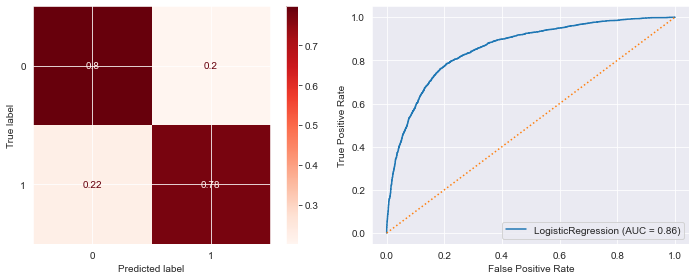

In [86]:
eval_clf(logreg2,X_test_df,y_test)

### Imputer Tuning With GridSearch

In [87]:
# Gridsearch Imputation Methods
gs_pipe = Pipeline([('ct',preprocessor),
                  ('clf',LogisticRegression())])



In [88]:
## Setting up params grid to change imputer params.
params = {'ct__Cat__imputer__strategy':['median','mean','most_frequent','constant'],
      'ct__Cat__imputer__fill_value':[0,-999]}

In [89]:
gridsearch = GridSearchCV(gs_pipe,params,n_jobs=-1,verbose=True,scoring='accuracy')

In [90]:
gridsearch.fit(X_train,y_train)
gridsearch.best_params_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   10.9s finished


{'ct__Cat__imputer__fill_value': 0,
 'ct__Cat__imputer__strategy': 'most_frequent'}

In [91]:
params = {'ct__Num__imputer':[SimpleImputer(),KNNImputer()]}

In [92]:
gridsearch = GridSearchCV(gs_pipe,params)

In [93]:
gridsearch.fit(X_train,y_train)
gridsearch.best_params_

{'ct__Num__imputer': KNNImputer()}

In [94]:
# Modify transformer pipeline with GridSearch best params

num_tf = Pipeline(steps=[
    ('imputer',KNNImputer()),
    ('scaler',StandardScaler())])

In [97]:
X_train_num_tf = num_tf.fit_transform(X_train[num_cols])
X_test_num_tf = num_tf.transform(X_test[num_cols])
X_train_num_tf

array([[-0.22748413, -1.62115853, -0.27417699, ..., -0.09232227,
         0.15267519,  0.50139475],
       [-0.22748413,  0.62090495, -0.27417699, ...,  1.4178574 ,
         1.49018567,  0.50139475],
       [-0.22748413, -1.62115853, -0.27417699, ..., -0.8474121 ,
        -1.1848353 ,  0.50139475],
       ...,
       [-0.22748413,  0.62090495, -0.27417699, ..., -0.09232227,
         0.15267519, -0.57846771],
       [-0.22748413,  0.62090495, -0.27417699, ...,  1.4178574 ,
         0.15267519, -0.57846771],
       [-0.22748413, -1.62115853, -0.27417699, ..., -0.09232227,
        -1.1848353 , -0.57846771]])

In [98]:
# Update Categorical transformer pipeline to impute missing values with 'most
# frequent' and then OneHotEncode all numerical columns

cat_tf = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('ohe',OneHotEncoder(sparse=False,handle_unknown='ignore'))])

In [99]:
X_train_cat_tf =cat_tf.fit_transform(X_train[cat_cols])
X_test_cat_tf =cat_tf.transform(X_test[cat_cols])

X_train_cat_tf

array([[1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [100]:
# Join both numerical and categorical Pipelines using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('Num',num_tf,num_cols),
    ('Cat',cat_tf,cat_cols)])
preprocessor

ColumnTransformer(transformers=[('Num',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['behavioral_antiviral_meds',
                                  'behavioral_avoidance',
                                  'behavioral_face_mask',
                                  'behavioral_wash_hands',
                                  'behavioral_large_gatherings',
                                  'behavioral_outside_home',
                                  'behavioral_touch_face',
                                  'doctor_recc_seasonal',
                                  'chronic_med_condition',
                                  'child_under_6...
                                  'household_adults', 'household_children']),
                                ('Cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['age_group', 'education', 'race', 'sex',
                                  'income_poverty', 'marital_status',
                                  'rent_or_own', 'employment_status',
                                  'hhs_geo_region', 'census_msa',
                                  'employment_industry',
                                  'employment_occupation'])])

In [101]:
## Get X_train and X_test from column transformer
X_train_tf = preprocessor.fit_transform(X_train)
X_test_tf = preprocessor.transform(X_test)

In [102]:
cat_features = list(preprocessor.named_transformers_['Cat'].named_steps['ohe']
                    .get_feature_names(cat_cols))

In [103]:
X_cols = num_cols+cat_features

In [104]:
X_train_df = pd.DataFrame(preprocessor.transform(X_train),
                          index=X_train.index, columns=X_cols)
X_test_df = pd.DataFrame(preprocessor.transform(X_test),
                          index=X_test.index, columns=X_cols)


## Tranform X_train and X_test and make into DataFrames
X_train_df

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,age_group_18 - 34 Years,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,education_12 Years,education_< 12 Years,education_College Graduate,education_Some College,race_Black,race_Hispanic,race_Other or Multiple,race_White,sex_Female,sex_Male,"income_poverty_<= $75,000, Above Poverty","income_poverty_> $75,000",income_poverty_Below Poverty,marital_status_Married,marital_status_Not Married,rent_or_own_Own,rent_or_own_Rent,employment_status_Employed,employment_status_Not in Labor Force,employment_status_Unemployed,hhs_geo_region_atmpeygn,hhs_geo_region_bhuqouqj,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA,employment_industry_arjwrbjb,employment_industry_atmlpfrs,employment_industry_cfqqtusy,employment_industry_dotnnunm,employment_industry_fcxhlnwr,employment_industry_haxffmxo,employment_industry_ldnlellj,employment_industry_mcubkhph,employment_industry_mfikgejo,employment_industry_msuufmds,employment_industry_nduyfdeo,employment_industry_phxvnwax,employment_industry_pxcmvdjn,employment_industry_qnlwzans,employment_industry_rucpziij,employment_industry_saaquncn,employment_industry_vjjrobsf,employment_industry_wlfvacwt,employment_industry_wxleyezf,employment_industry_xicduogh,employment_industry_xqicxuve,employment_occupation_bxpfxfdn,employment_occupation_ccgxvspp,employment_occupation_cmhcxjea,employment_occupation_dcjcmpih,employment_occupation_dlvbwzss,employment_occupation_emcorrxb,employment_occupation_haliazsg,employment_occupation_hfxkjkmi,employment_occupation_hodpvpew,employment_occupation_kldqjyjy,employment_occupation_mxkfnird,employment_occupation_oijqvulv,employment_occupation_pvmttkik,employment_occupation_qxajmpny,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
25194,-0.23,-1.62,-0.27,-2.16,-0.75,-0.72,-1.44,0.60,-0.64,-0.30,-0.36,0.45,-0.03,-0.52,-0.09,0.15,0.50,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
14006,-0.23,0.62,-0.27,0.46,-0.75,-0.72,-1.44,1.47,1.61,3.39,-0.36,0.45,-0.03,1.66,1.42,1.49,0.50,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
11285,-0.23,-1.62,-0.27,-2.16,-0.75,-0.72,-1.44,-0.71,-0.64,-0.30,-0.36,0.45,-0.03,-0.52,-0.85,-1.18,0.50,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.0

In [105]:
# Combine preprocessing steps and model
full_pipeline_3 = Pipeline([
    ("preprocessor", preprocessor),
    ("estimator", logreg2),
])

In [106]:
# Train model with upodated parameter
full_pipeline_3.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('Num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['behavioral_antiviral_meds',
                                                   'behavioral_avoidance',
                                                   'behavioral_face_mask',
                                                   'behavioral_wash_hands',
                                                   'behavioral_large_gatherings',
                                                   'behavioral_outside_home',
                                                   'behavioral_touch_face',
                                                   'doctor_recc_seasonal',
                                                   'chron...
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['age_group', 'education',
                                                   'race', 'sex',
                                                   'income_poverty',
                                                   'marital_status',
                                                   'rent_or_own',
                                                   'employment_status',
                                                   'hhs_geo_region',
                                                   'census_msa',
                                                   'employment_industry',
                                                   'employment_occupation'])])),
                ('estimator',
                 LogisticRegression(C=1, class_weight='balanced', max_iter=600,
                                    penalty='l1', solver='liblinear'))])

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      3634
           1       0.76      0.77      0.77      3043

    accuracy                           0.78      6677
   macro avg       0.78      0.78      0.78      6677
weighted avg       0.78      0.78      0.78      6677



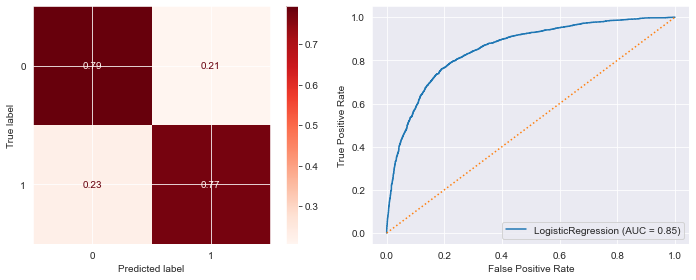

In [107]:
eval_clf(logreg2,X_test_tf,y_test)

## DecisionTree

### Fitting Model

In [119]:
## Create, fit, and evaluate a vanilla DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(criterion='entropy')
dt_clf.fit(X_train_df, y_train)

DecisionTreeClassifier(criterion='entropy')

### Evaluating Model Performance

              precision    recall  f1-score   support

           0       0.72      0.70      0.71      3634
           1       0.66      0.67      0.66      3043

    accuracy                           0.69      6677
   macro avg       0.69      0.69      0.69      6677
weighted avg       0.69      0.69      0.69      6677



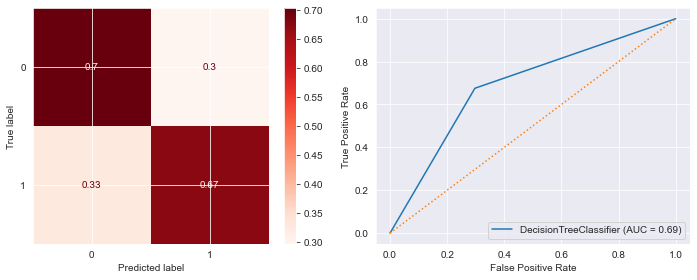

Training Score = 1.00
Test Score = 0.69


In [120]:
eval_clf(dt_clf, X_test_df,y_test,X_train=X_train_df,y_train=y_train)

The vanilla model is highly overfit, will need to prune the decision tree.

### Hyperparameter Tuning

In [121]:
params = {'max_depth':[None,3,5,10,20],
         'min_samples_leaf':[1,2,3,5],
         'criterion':['entropy','ginie']}


## Instantiate & Fit GridSearchCV
gridsearch = GridSearchCV(DecisionTreeClassifier(),params,n_jobs=-1)
gridsearch.fit(X_train_df,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'ginie'],
                         'max_depth': [None, 3, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 3, 5]})

In [122]:
gridsearch.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1}

In [123]:
# Fit classifier with best parameters
dt_clf_2 = DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                  min_samples_leaf=1)
dt_clf_2.fit(X_train_df, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

              precision    recall  f1-score   support

           0       0.75      0.85      0.79      3634
           1       0.78      0.66      0.72      3043

    accuracy                           0.76      6677
   macro avg       0.77      0.75      0.76      6677
weighted avg       0.76      0.76      0.76      6677



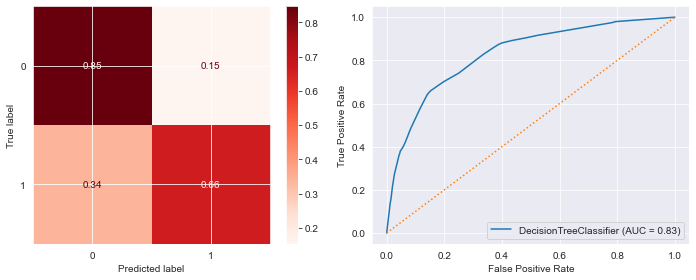

Training Score = 0.76
Test Score = 0.76


In [124]:
## Evaluate with the classifier
eval_clf(dt_clf_2,X_test_df,y_test,X_train=X_train_df,y_train=y_train)

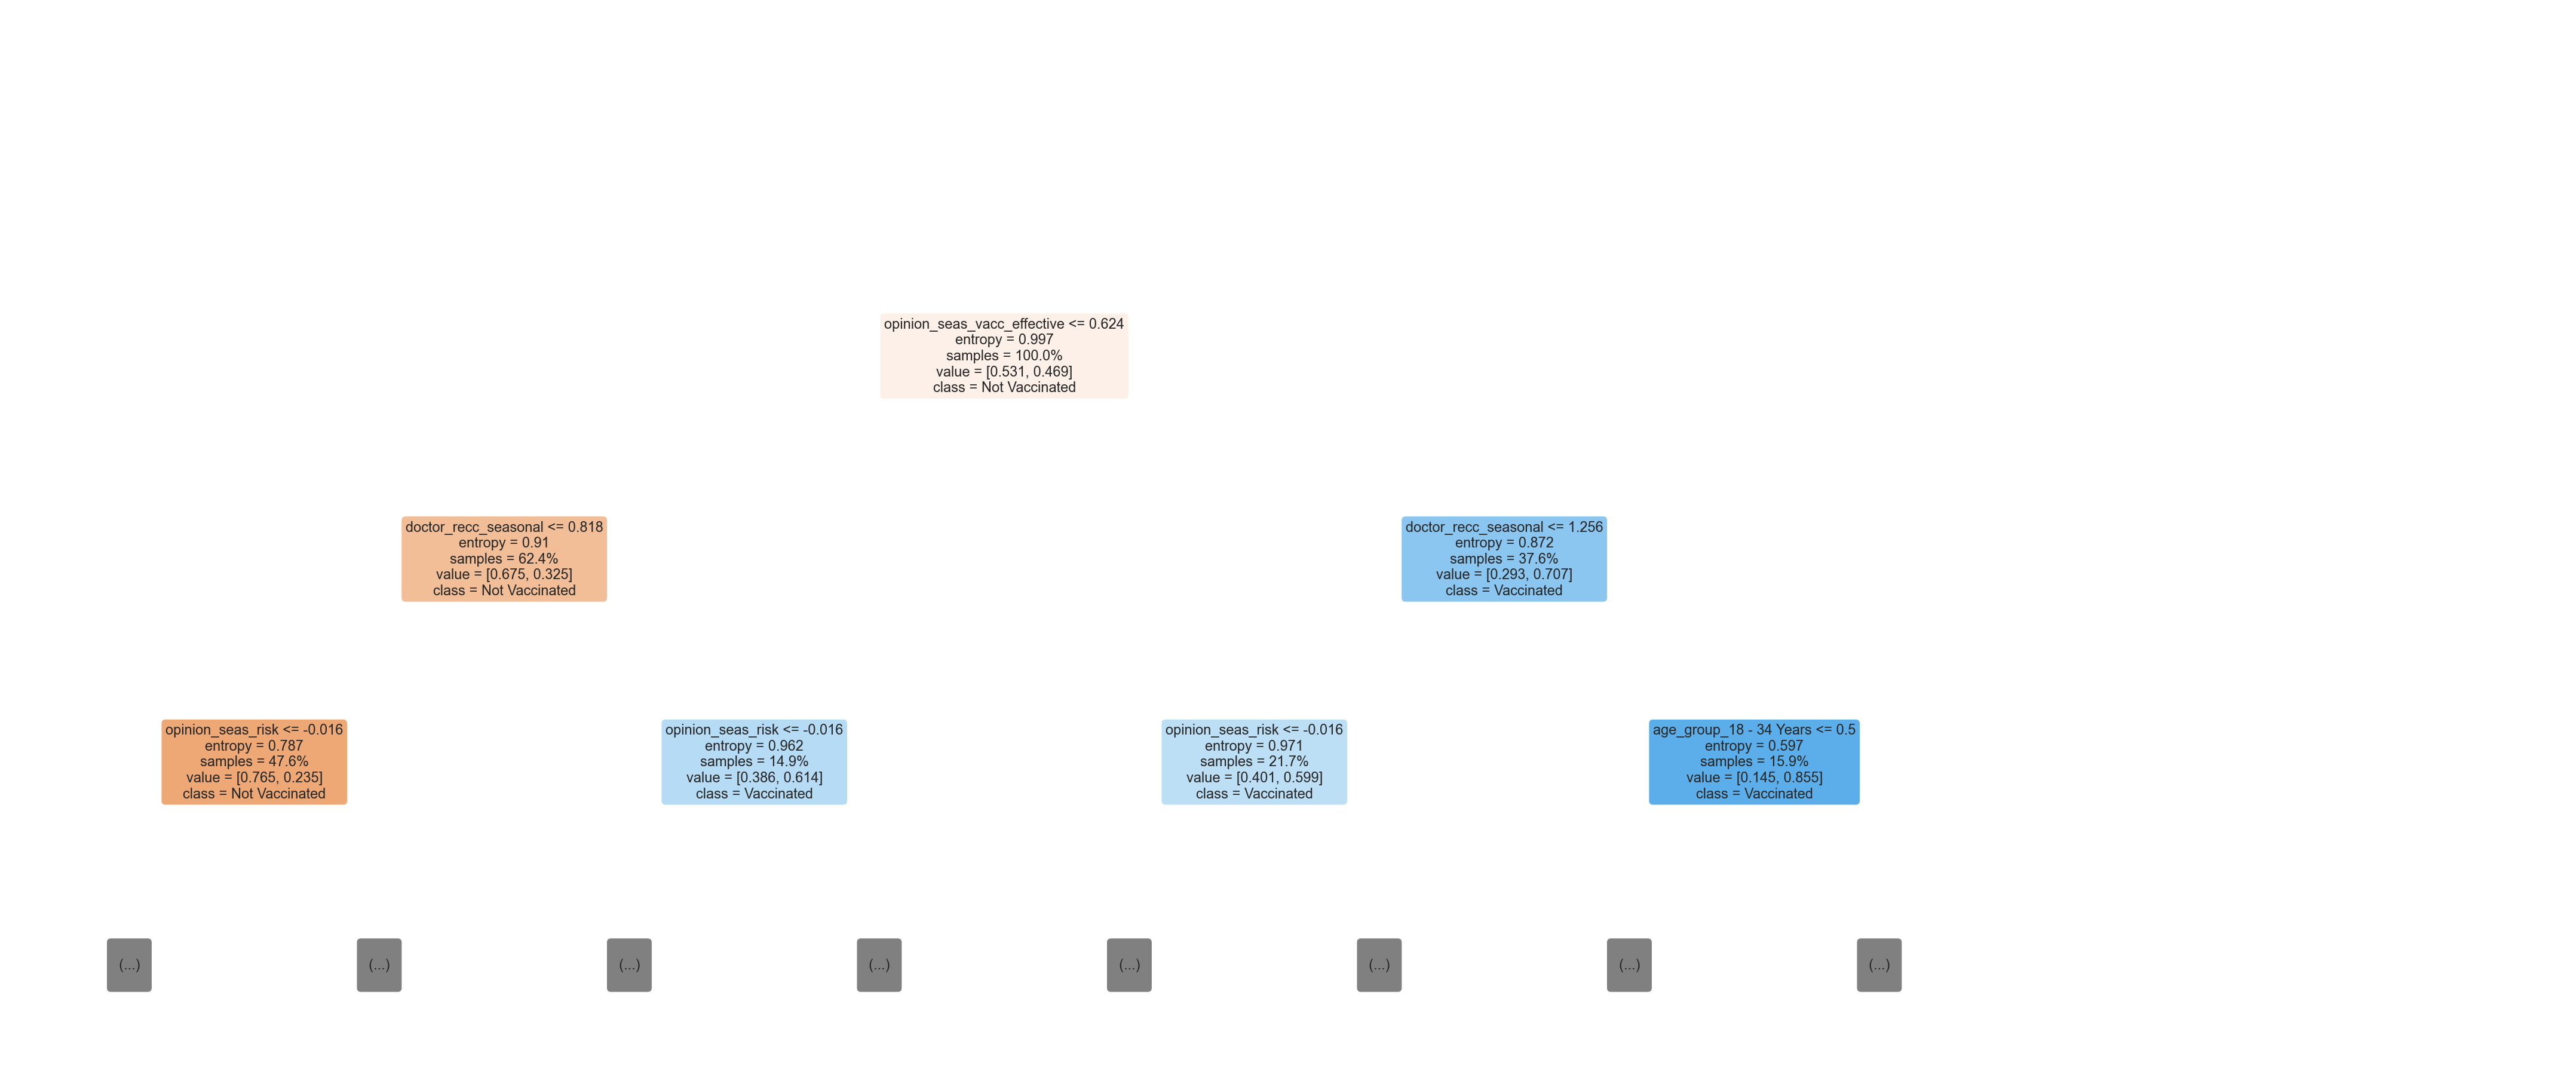

In [209]:
# Visualize Decision Tree with Sci-kit learn plot tree
from sklearn.tree import plot_tree

fig,ax = plt.subplots(figsize=(60,25))
plot_tree(dt_clf_2,max_depth=2,filled=True,rounded=True,proportion=True,
          feature_names=X_train_df.columns,
          class_names=['Not Vaccinated','Vaccinated'],ax=ax);
fig.tight_layout()
fig.savefig('vax_tree.pdf', dpi=300,orientation='landscape')


## Random Forest 

### Fitting Model

In [125]:
rf = RandomForestClassifier(class_weight='balanced')

In [126]:
rf.fit(X_train_df,y_train)

RandomForestClassifier(class_weight='balanced')

### Evaluating Model Performance

              precision    recall  f1-score   support

           0       0.79      0.81      0.80      3634
           1       0.76      0.74      0.75      3043

    accuracy                           0.78      6677
   macro avg       0.78      0.77      0.77      6677
weighted avg       0.78      0.78      0.78      6677



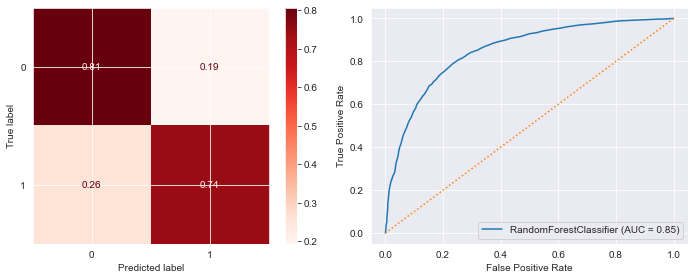

In [127]:
eval_clf(rf,X_test_tf,y_test)

### Hyperparameter Tuning

In [128]:
param_grid = {
    'n_estimators':[10, 50, 100],
    'criterion':['gini', 'entropy'],
    'max_depth': [3, 5, 10, 30],
    'min_samples_split': [1, 5, 20],
    'min_impurity_decrease': [0, 0.01, 0.02],
    'max_features': [10, 20],
    'max_leaf_nodes': [6000, 2000, 500]
}

In [129]:
gs_rf = GridSearchCV(rf, param_grid, scoring='accuracy',cv=3,verbose=True,n_jobs=-1)

In [130]:
gs_rf.fit(X_train_df, y_train)

print(gs_rf.best_estimator_)
print(gs_rf.best_score_)

Fitting 3 folds for each of 1296 candidates, totalling 3888 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   32.3s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 3888 out of 3888 | elapsed: 16.0min finished


RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=30, max_features=20, max_leaf_nodes=500,
                       min_impurity_decrease=0, min_samples_split=20)
0.7786822501216584


In [146]:
# Review model performance for a model with these optimal params
rf_tuned = RandomForestClassifier(class_weight='balanced', criterion='entropy',
                            max_depth=30, 
                            max_features=20, 
                            max_leaf_nodes=500, 
                            min_impurity_decrease=0,
                            min_samples_split=20)


rf_tuned.fit(X_train_df, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=30, max_features=20, max_leaf_nodes=500,
                       min_impurity_decrease=0, min_samples_split=20)

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      3634
           1       0.76      0.77      0.77      3043

    accuracy                           0.78      6677
   macro avg       0.78      0.78      0.78      6677
weighted avg       0.78      0.78      0.78      6677



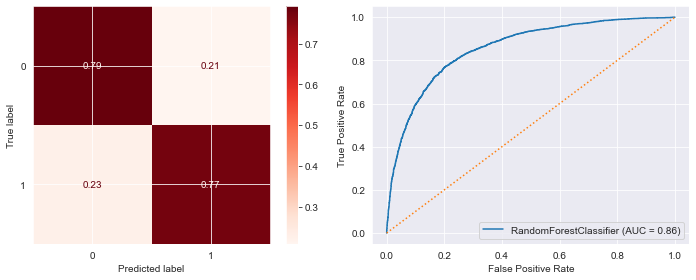

Training Score = 0.83
Test Score = 0.78


In [147]:
eval_clf(rf_tuned, X_test_df, y_test, X_train=X_train_df, y_train=y_train)

In [134]:
clf = Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l2"))),
  ('classification', RandomForestClassifier(class_weight='balanced', max_depth=30, max_features=20,
                       max_leaf_nodes=500, min_impurity_decrease=0,
                       min_samples_split=20))
])

clf.fit(X_train_df, y_train)

Pipeline(steps=[('feature_selection', SelectFromModel(estimator=LinearSVC())),
                ('classification',
                 RandomForestClassifier(class_weight='balanced', max_depth=30,
                                        max_features=20, max_leaf_nodes=500,
                                        min_impurity_decrease=0,
                                        min_samples_split=20))])

In [135]:
print('Trainging Score:'+str(clf.score(X_train_df, y_train)))
print('Testing Score:'+str(clf.score(X_test_df, y_test)))

Trainging Score:0.809535696455317
Testing Score:0.7775947281713345


              precision    recall  f1-score   support

           0       0.81      0.78      0.79      3634
           1       0.74      0.78      0.76      3043

    accuracy                           0.78      6677
   macro avg       0.78      0.78      0.78      6677
weighted avg       0.78      0.78      0.78      6677



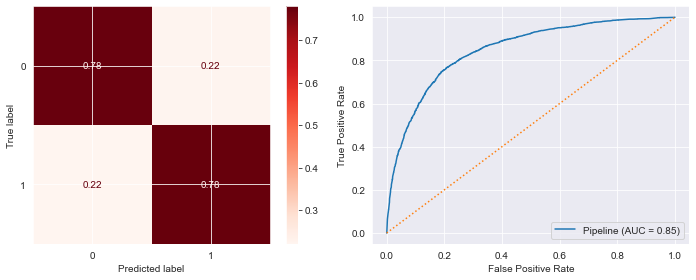

Training Score = 0.81
Test Score = 0.78


In [136]:
eval_clf(clf,X_test_df, y_test, X_train=X_train_df, y_train=y_train)

## XGBoost

### Fitting Model

In [137]:
from xgboost import XGBClassifier

In [138]:
bst = XGBClassifier()

In [139]:
bst.fit(X_train_df[num_cols],y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### Evaluating Model Performance

              precision    recall  f1-score   support

           0       0.78      0.78      0.78      3634
           1       0.74      0.74      0.74      3043

    accuracy                           0.76      6677
   macro avg       0.76      0.76      0.76      6677
weighted avg       0.76      0.76      0.76      6677



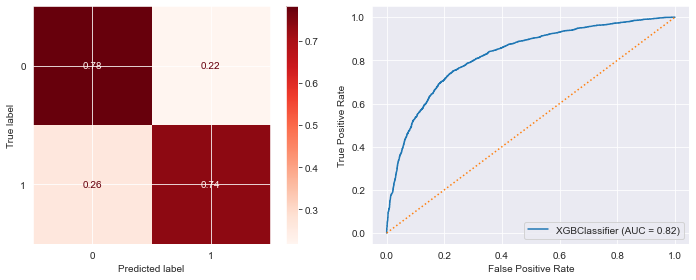

Training Score = 0.82
Test Score = 0.76


In [140]:
eval_clf(bst,
         X_test_df[num_cols],
         y_test, 
         X_train=X_train_df[num_cols], 
         y_train=y_train
        )

### Hyperparameter Tuning

In [141]:
params = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}

In [142]:
grid_boost= GridSearchCV(bst, 
                         params, 
                         scoring='accuracy', 
                         n_jobs=-1,
                         verbose=True)
grid_boost.fit(X_train_df[num_cols], y_train)

best_parameters = grid_boost.best_params_
best_parameters

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   46.8s finished


{'learning_rate': 0.1,
 'max_depth': 6,
 'min_child_weight': 1,
 'n_estimators': 100,
 'subsample': 0.7}

In [143]:
best_xgb = XGBClassifier(learning_rate=0.1, max_depth=6, min_child_weight=1,
                         n_estimators=100, subsample=0.7)
best_xgb.fit(X_train_df[num_cols], y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
              tree_method='exact', validate_parameters=1, verbosity=None)

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      3634
           1       0.75      0.75      0.75      3043

    accuracy                           0.77      6677
   macro avg       0.77      0.77      0.77      6677
weighted avg       0.77      0.77      0.77      6677



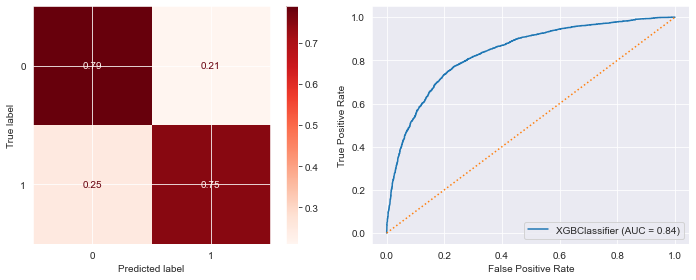

In [144]:
eval_clf(best_xgb, X_test_df[num_cols], y_test)

# iNTERPRET

After fitting and tuning 4 different classification models, we can parse out feature importances that have the most impact on determining whether someone will receive the vaccine or not. For this interpretation process, we will examine the feature importances of all 4 models to see if there is any patterns to recognize. If the models share some of the top features, we can interpret that as it being critical to their chance of getting vaccinated.

## Comparing Feature Importances

In [167]:
#accessing feature importance values of the tuned logistic regression model and sorting them
logreg_importances_df = pd.Series(logreg2.coef_[0], index=X_train_df.columns).sort_values(ascending=False)
#parsing the series to a dataframe
logregcv_importances_df = logreg_importances_df.reset_index()
logregcv_importances_df.columns = ['LogReg-Attribute', 'LogReg-Importance']
top_lr = logregcv_importances_df.head(15)
top_lr

,LogReg-Attribute,LogReg-Importance
0,employment_industry_haxffmxo,2.40
1,age_group_65+ Years,0.87
2,opinion_seas_risk,0.73
3,employment_industry_msuufmds,0.65
4,opinion_seas_vacc_effective,0.61
5,doctor_recc_seasonal,0.57
6,employment_occupation_dcjcmpih,0.45
7,employment_industry_arjwrbjb,0.30
8,employment_occupation_vlluhbov,0.26
9,employment_industry_mfikgejo,0.25


In [166]:
# accessing feature importance values of the tuned random forest model and sorting them
dt_importances_df = pd.Series(dt_clf_2.feature_importances_, index=X_train_df.columns).sort_values(ascending=False)
#parsing the series to a dataframe
dt_importances_df = dt_importances_df.reset_index()
dt_importances_df.columns = ['DT-Attribute', 'DT-Importance']
top_dt = dt_importances_df.head(15)
top_dt

,DT-Attribute,DT-Importance
0,opinion_seas_vacc_effective,0.39
1,doctor_recc_seasonal,0.27
2,opinion_seas_risk,0.18
3,age_group_65+ Years,0.08
4,age_group_18 - 34 Years,0.04
5,health_worker,0.02
6,opinion_seas_sick_from_vacc,0.01
7,employment_occupation_cmhcxjea,0.00
8,household_children,0.00
9,health_insurance,0.00


In [165]:
# accessing feature importance values of the tuned random forest model and sorting them
rf_importances_df = pd.Series(rf_tuned.feature_importances_, index=X_train_df.columns).sort_values(ascending=False)
#parsing the series to a dataframe
rf_importances_df = rf_importances_df.reset_index()
rf_importances_df.columns = ['RF-Attribute', 'RF-Importance']
top_rf = rf_importances_df.head(15)
top_rf

,RF-Attribute,RF-Importance
0,opinion_seas_vacc_effective,0.18
1,opinion_seas_risk,0.17
2,doctor_recc_seasonal,0.16
3,age_group_65+ Years,0.05
4,opinion_seas_sick_from_vacc,0.03
5,age_group_18 - 34 Years,0.03
6,health_insurance,0.03
7,health_worker,0.02
8,household_children,0.02
9,chronic_med_condition,0.01


In [163]:
#parsing feature importances to a series and sorting
xgb_importances_df = pd.Series(best_xgb.feature_importances_, index=X_train_df[num_cols].columns).sort_values(ascending=False)
#parsing the series to a dataframe
xgb_importances_df = xgb_importances_df.reset_index()
xgb_importances_df.columns=['XGB-Attribute', 'XGB-Importance']
top_xgb = xgb_importances_df.head(15)
top_xgb

,XGB-Attribute,XGB-Importance
0,doctor_recc_seasonal,0.24
1,opinion_seas_vacc_effective,0.23
2,opinion_seas_risk,0.11
3,health_worker,0.05
4,opinion_seas_sick_from_vacc,0.04
5,health_insurance,0.04
6,household_children,0.03
7,behavioral_touch_face,0.03
8,chronic_med_condition,0.03
9,household_adults,0.03


In [169]:
#Concatenating feature importances into a single dataframe
importances_df = pd.concat([top_lr, top_dt, top_rf, top_xgb], axis=1)
importances_df

,LogReg-Attribute,LogReg-Importance,DT-Attribute,DT-Importance,RF-Attribute,RF-Importance,XGB-Attribute,XGB-Importance
0,employment_industry_haxffmxo,2.40,opinion_seas_vacc_effective,0.39,opinion_seas_vacc_effective,0.18,doctor_recc_seasonal,0.24
1,age_group_65+ Years,0.87,doctor_recc_seasonal,0.27,opinion_seas_risk,0.17,opinion_seas_vacc_effective,0.23
2,opinion_seas_risk,0.73,opinion_seas_risk,0.18,doctor_recc_seasonal,0.16,opinion_seas_risk,0.11
3,employment_industry_msuufmds,0.65,age_group_65+ Years,0.08,age_group_65+ Years,0.05,health_worker,0.05
4,opinion_seas_vacc_effective,0.61,age_group_18 - 34 Years,0.04,opinion_seas_sick_from_vacc,0.03,opinion_seas_sick_from_vacc,0.04
5,doctor_recc_seasonal,0.57,health_worker,0.02,age_group_18 - 34 Years,0.03,health_insurance,0.04
6,employment_occupation_dcjcmpih,0.45,opinion_seas_sick_from_vacc,0.01,health_insurance,0.03,household_children,0.03
7,employment_industry_arjwrbjb,0.30,employment_occupation_cmhcxjea,0.00,health_worker,0.02,behavioral_touch_face,0.03
8,employment_occupation_vlluhbov,0.26,household_children,0.00,household_children,0.02,chronic_med_condition,0.03
9,employment_industry_mfikgejo,0.25,health_insurance,0.00,chronic_med_condition,0.01,household_adults,0.03


## Feature Importance Comparison

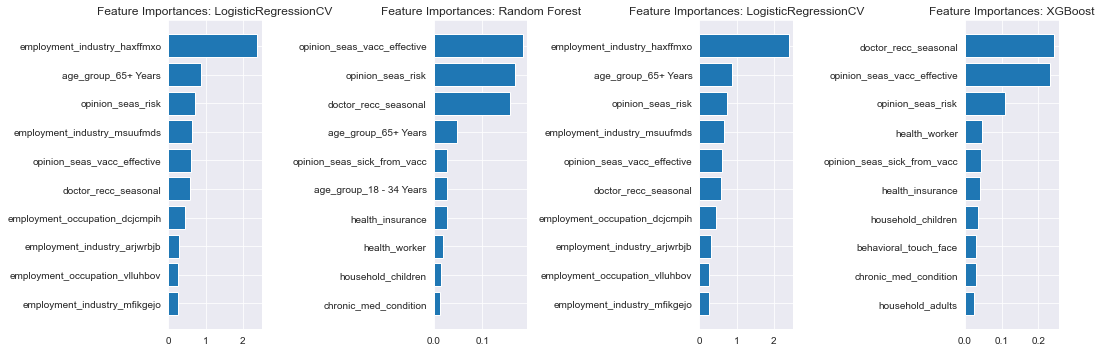

In [177]:
#plotting feature importances for all models for comparison

fig, ax = plt.subplots(ncols=4, figsize=(15,5))

logregcv_importances_df = logregcv_importances_df.sort_values(by='LogReg-Importance', ascending=True).tail(10)
ax[0].barh(logregcv_importances_df['LogReg-Attribute'], logregcv_importances_df['LogReg-Importance'])
ax[0].set_title('Feature Importances: LogisticRegressionCV')
plt.tight_layout()

rf_importances_df = rf_importances_df.sort_values(by='RF-Importance', ascending=True).tail(10)
ax[1].barh(rf_importances_df['RF-Attribute'], rf_importances_df['RF-Importance'])
ax[1].set_title('Feature Importances: Random Forest')

dr_importances_df = logregcv_importances_df.sort_values(by='LogReg-Importance', ascending=True).tail(10)
ax[2].barh(logregcv_importances_df['LogReg-Attribute'], logregcv_importances_df['LogReg-Importance'])
ax[2].set_title('Feature Importances: LogisticRegressionCV')
plt.tight_layout()

xgb_importances_df = xgb_importances_df.sort_values(by='XGB-Importance', ascending=True).tail(10)
ax[3].barh(xgb_importances_df['XGB-Attribute'], xgb_importances_df['XGB-Importance'])
ax[3].set_title('Feature Importances: XGBoost');

# CONCLUSIONS & RECOMMENDATIONS

## Best Model Results

Out of the 4 tuned classifier models, the Logistic Regression model was the best one in identifying vaccinations. 
It had a 79% accuracy score for identifying who received the vaccine compared to 53% by a baseline Dummy Classifier model. 
The next best performer was the RandomForest model at a very 78% accuracy. 


## Takeaways and Recommendations

The most consistent top feature across all 4 models are: 
>1) A respondent's opinion about risk of getting sick with seasonal flu without vaccine\
>2)   Respondent's opinion about seasonal flu vaccine effectiveness.\
>3) If the seasonal flu vaccine was recommended by their doctor.

Based off these findings Public Health Organizations can prioritize their messaging and actions to improve the likelihood that and individual will receive the flu vaccine. 

According to the WHO there are about 3 to 5 million cases of severe illness and 290,000 to 650,000 deaths from seasonal flu, worldwide that occur every year. The more the public is aware of this, the more like they are to get vaccinated.

Lastly, 


Results

Top Features:

Host Listings Count - fewer listings
Host Response Rate - higher response rate
Price - mixed values; higher prices more likely than lower
Number of Reviews - fewer reviews less likely
Instant Bookable - not 'instant-bookable' more likely
Recommendations

Focus on fewer listings

Less is more. Hosts with fewer properties may have more time/energy/money to invest in their guests' experiences; maintenance; etc.. Assuming this is correct, then I would advise hosts to focus on a small number of properties to avoid being stretched too thin.

An alternative understanding may be that the "hosts" with larger numbers of properties may be businesses instead of individual hosts. These businesses may not offer the same level of attention/care/etc. that individual hosts would offer, causing their scores to be lower.

Respond to guests as often as possible

Higher response rates are associated with higher scores. This makes sense as guests who attempt to contact the host would expect a reply, especially if they experience an issue. If they do not receive a reply, they may be dissatisfied.

Do not enable "Instant Bookable"

The data dictionary states that this feature is, "an indicator of a commercial listing." This would indicate that properties not owned by a business would be more likely to achieve our target score. Additionally, non-commercial hosts should avoid using this feature.






### Future Work

For further development, I would do the following:

Include continuous data from survey respondants. While the traditional survey questions are respected and informative, text-based reviews take precedence. In my experience in hotel operations, I would often get much more information from the written reviews, including nuances and specifics that the yes/no or 1-5 ratings miss.

Include other regions: My current dataset focused only on the Washington, D.C. area. Due to different regional factors (social/economic demographics; legal restrictions; etc.), other markets may show other features to be more important than my results. Additionally, I would like to explore international data to compare with the domestic data.

- 